In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Stroke

In [323]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [324]:
df = df[df['gender']!='Other']
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).astype(int)
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0}).astype(int)
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0}).astype(int)
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': np.nan}).astype(float)
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['work_type'] = df['work_type'].replace({'children': 0, 'Never_worked': 1, 'Govt_job': 2, 'Private': 3, 'Self-employed': 4}).astype(int)
df = df.drop(columns=['id'])

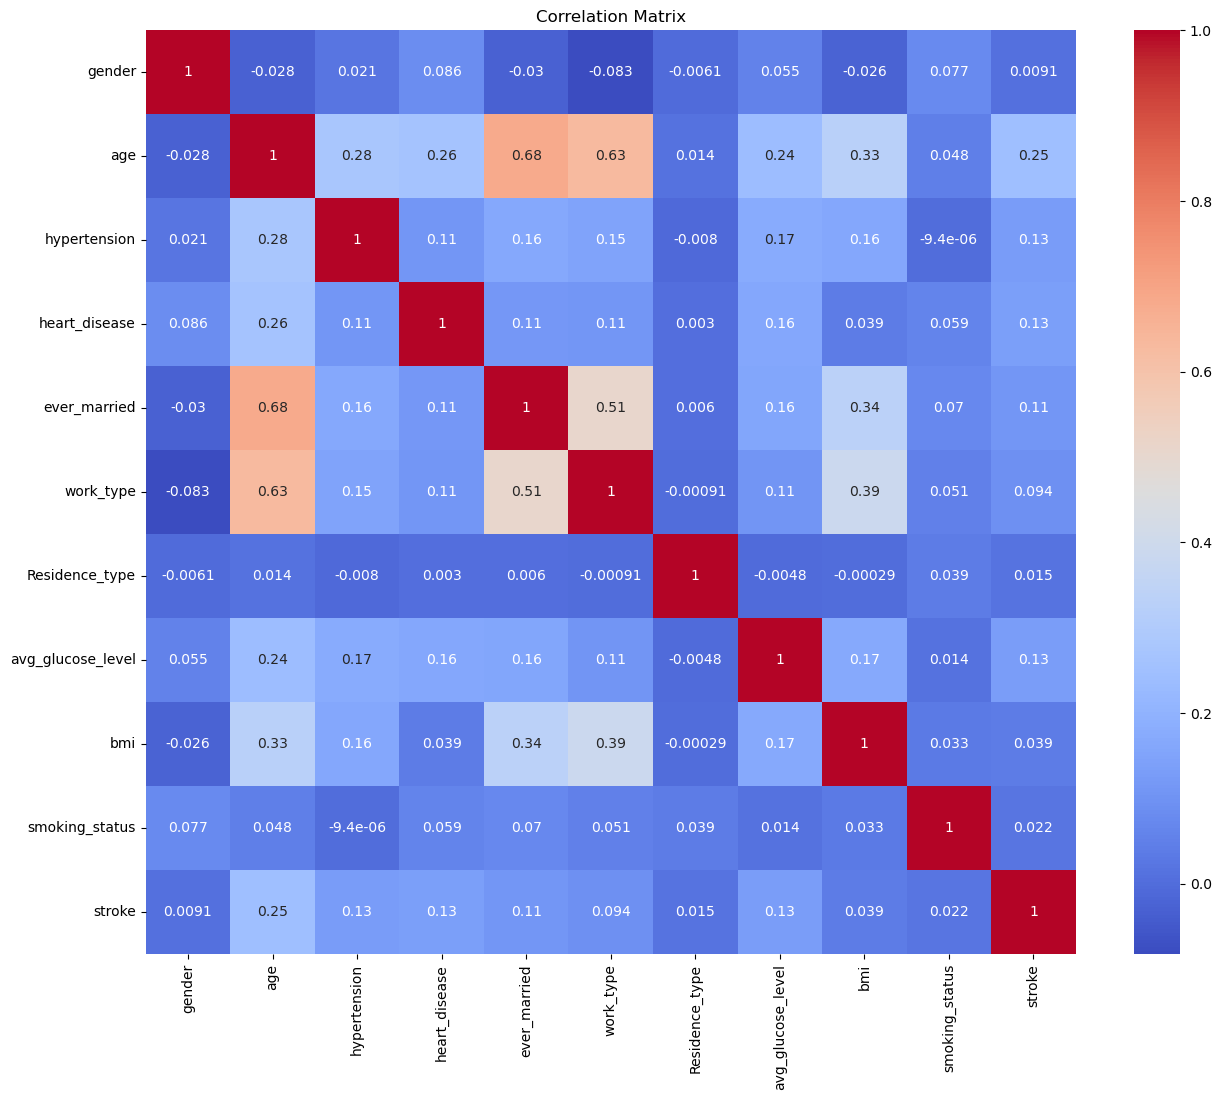

In [325]:
df = df.select_dtypes("number")
plt.figure(figsize=(15,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [326]:
df = df.drop(columns = ['gender', 'Residence_type', 'smoking_status', 'ever_married'])

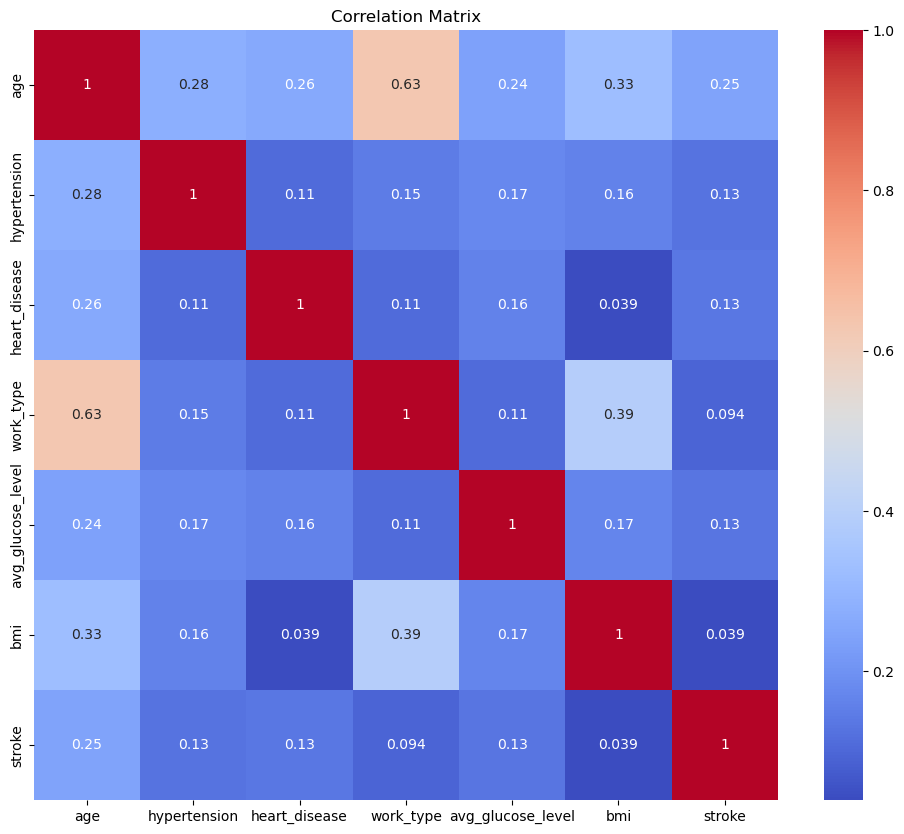

In [329]:
df = df.select_dtypes("number")
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [155]:
from sklearn.metrics import confusion_matrix
# Calcula y muestra una matriz de confusión utilizando Seaborn
def calcularMatrizConfusion(y_test, y_pred):    
    #y_pred_class = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(1,figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')#, xticklabels=class_names,  yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion matrix')
    plt.show

Accuracy: 0.9050880626223092
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.16      0.19      0.17        54

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.56      1022
weighted avg       0.91      0.91      0.91      1022



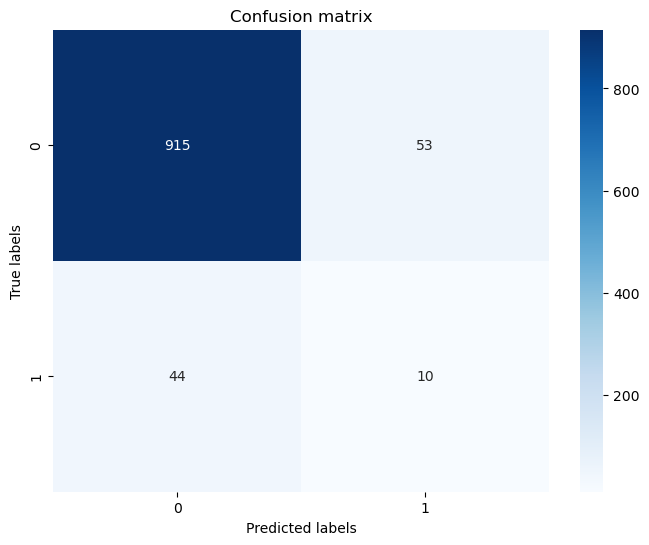

In [156]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba
X = df.drop(columns=['stroke'])  # Variables independientes
y = df['stroke']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
calcularMatrizConfusion(y_test, y_pred)

In [ ]:
def mostrarResultados(tasa_acierto_train, perdida_train, tasa_acierto_test, perdida_test, tiempo_entrenamiento, y_test, y_pred):
    print("Tasa de acierto (entrenamiento): {:.2f}%".format(tasa_acierto_train * 100))
    print("Tasa de pérdida (entrenamiento): {:.4f}%".format(perdida_train * 100))
    print("Tiempo de entrenamiento: {:.2f} segundos".format(tiempo_entrenamiento))
    print("Tasa de acierto (test): {:.2f}%".format(tasa_acierto_test * 100))
    print("Tasa de pérdida (test): {:.4f}%".format(perdida_test * 100))   
    calcularMatrizConfusion(y_test, y_pred)